# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 분석의 목적과 변수 확인

In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. 데이터 전체적으로 살펴보기

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Survived

In [9]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

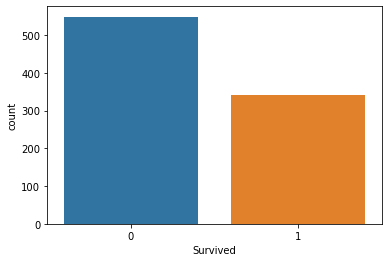

In [10]:
sns.countplot(x='Survived', data=titanic_df)
plt.show()

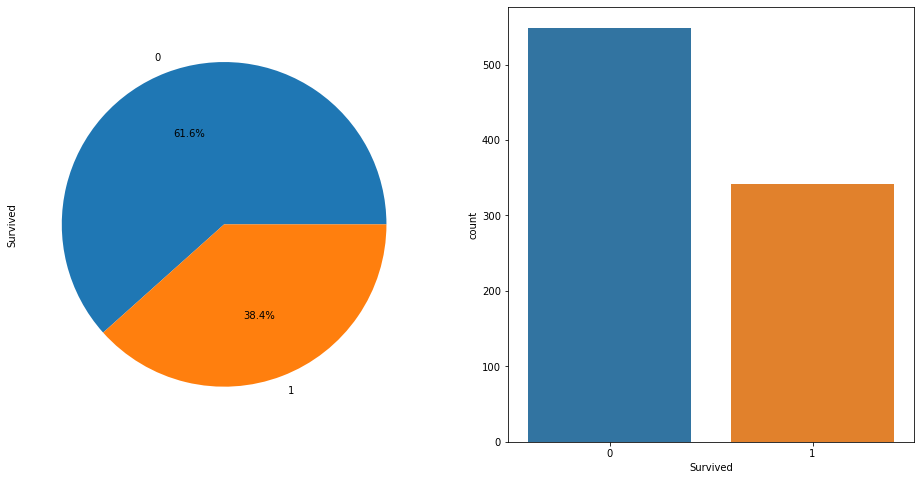

In [11]:
f, ax = plt.subplots(1, 2, figsize=(16,8))
titanic_df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
sns.countplot(x='Survived', data=titanic_df, ax=ax[1])
plt.show()

### 2. Pclass

In [12]:
titanic_df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
titanic_df[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


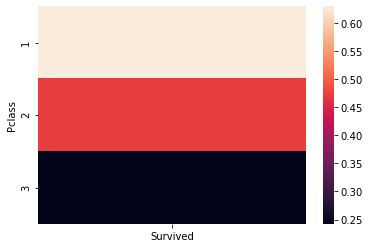

In [15]:
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean())
plt.show()

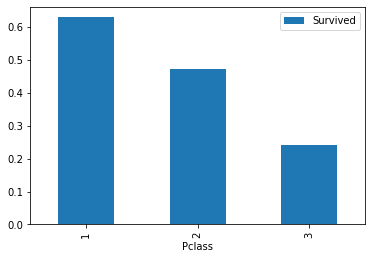

In [16]:
titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
plt.show()

### 3. Sex

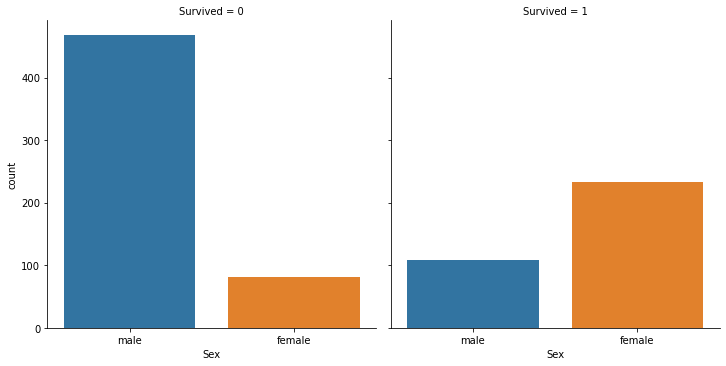

In [17]:
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### 4. Age

In [18]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
titanic_df[titanic_df.Survived==1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

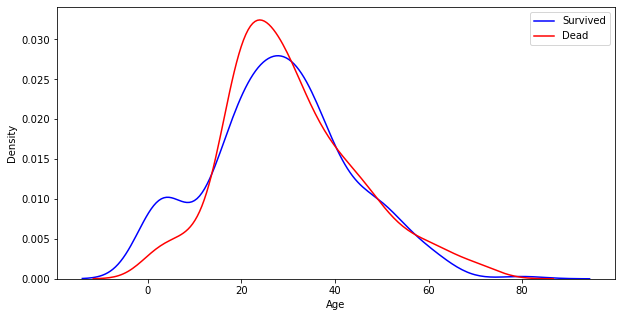

In [20]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'], ax=ax, color='b')
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'], ax=ax, color='r')

plt.legend(['Survived', 'Dead'])
plt.show()

### +) Sex + Pclass vs Survived

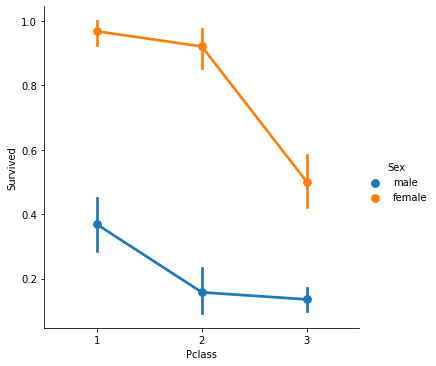

In [21]:
sns.catplot(x='Pclass', y='Survived', kind='point', hue='Sex', data=titanic_df)
plt.show()

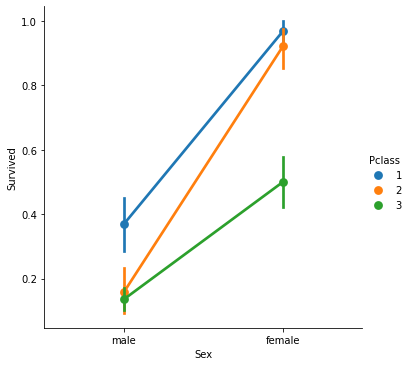

In [22]:
sns.catplot(x='Sex', y='Survived', kind='point', hue='Pclass', data=titanic_df)
plt.show()

### +) Age + Pclass

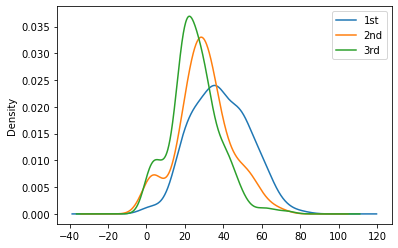

In [23]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st', '2nd', '3rd'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### Fare

In [25]:
## Fare 결측치 1개 median으로 채우기
titanic_df['Fare'].isnull().sum()

0

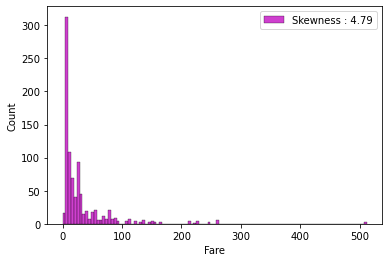

In [27]:
g = sns.histplot(titanic_df["Fare"], color="m", label="Skewness : %.2f"%(titanic_df["Fare"].skew()))
g = g.legend(loc="best")

- 데이터 분포 정규분포화

In [28]:
titanic_df["Fare"] = titanic_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

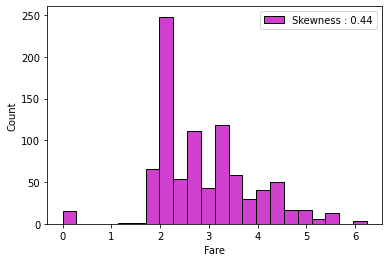

In [29]:
g = sns.histplot(titanic_df["Fare"], color="m", label="Skewness : %.2f"%(titanic_df["Fare"].skew()))
g = g.legend(loc="best")

### Sibsp

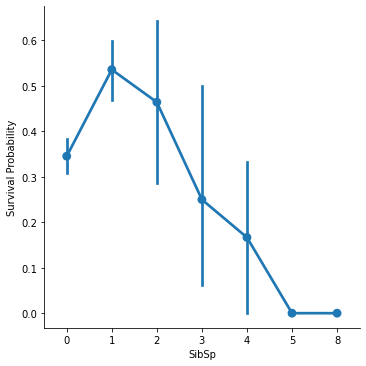

In [32]:
g = sns.catplot(x="SibSp",y="Survived",kind='point',data = titanic_df)
g = g.set_ylabels("Survival Probability")

### Parch

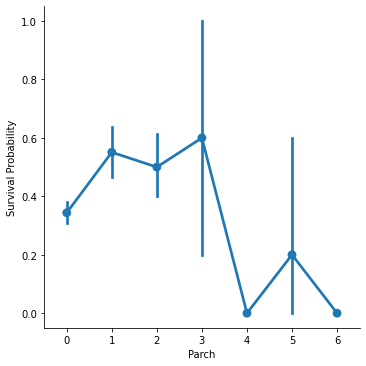

In [33]:
g = sns.catplot(x="Parch",y="Survived",kind='point',data = titanic_df)
g = g.set_ylabels("Survival Probability")

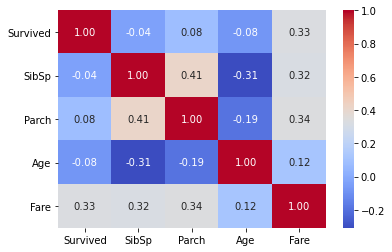

In [36]:
g = sns.heatmap(titanic_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

- Log를 이용하여 변형시킨 Fare의 영향이 생각보다 높음을 볼 수 있음

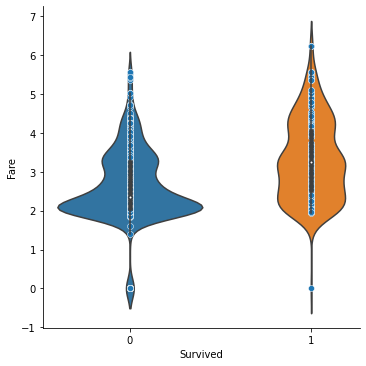

In [39]:
g=sns.catplot(x='Survived',y='Fare', data=titanic_df, kind="violin")
g=sns.scatterplot(x='Survived',y='Fare', data=titanic_df)